In [1]:
import seaborn as sns 
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
seed = 1245
test_size = 0.2
k_folds = 5

max_depth = None
n_estimators = 130

In [3]:
data = loadmat('Salinas_corrected.mat')['salinas_corrected']
label = loadmat('Salinas_gt.mat')['salinas_gt']
data_reshaped = data.reshape(-1, data.shape[-1])
label_reshaped = label.flatten()
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, label_reshaped, test_size=test_size, random_state=seed)

In [4]:
pipe = Pipeline([
    ('std', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators))
    ])

In [ ]:
# # Gird search to find the best hyperparameters. It is only used to search the hyperparameters of the best performance.
# parameters = [
#     {
#         'clf__n_estimators': [50, 60, 70, 80, 90, 100, 120, 130, 140],
#         'clf__max_depth': [40, 60, 80, 100, None]
#     }
# ]
# model = GridSearchCV(pipe, parameters, refit = True, cv = 5, verbose = 1, n_jobs = -1)
# model.fit(X_train, y_train)
# print('Best hyperparameters: ', model.best_params_)
# print('Best performance: : ', model.best_score_)

# max_depth = model.best_params_['clf__max_depth']
# n_estimators = model.best_params_['clf__n_estimators']

# pipe = Pipeline([
#     ('std', StandardScaler()),
#     ('clf', RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators))
#     ])

In [5]:
# KFold
y_preds = []
label_preds = []
pred_test_scores = []

kfolds = KFold(n_splits=k_folds, shuffle=True, random_state=seed)

for k, (train_index, test_index) in enumerate(kfolds.split(X_train)):
    X_train_fold, y_train_fold = X_train[train_index], y_train[train_index]
    X_test_fold, y_test_fold = X_train[test_index], y_train[test_index]
    pipe.fit(X_train_fold, y_train_fold)

    y_pred = pipe.predict(X_test)
    y_pred_fold = pipe.predict(X_test_fold)
    label_pred = pipe.predict(data_reshaped)

    pred_test_score = accuracy_score(y_test, y_pred)
    pred_valid_score = accuracy_score(y_test_fold, y_pred_fold)

    y_preds.append(y_pred)
    label_preds.append(label_pred)
    pred_test_scores.append(pred_test_score)
    
    print("Fold ", k, "Test set: ", round(pred_test_score, 4), "Validation Set: ", round(pred_valid_score, 4))

Fold  0 Test set:  0.9281 Validation Set:  0.932
Fold  1 Test set:  0.9287 Validation Set:  0.9315
Fold  2 Test set:  0.9284 Validation Set:  0.9275
Fold  3 Test set:  0.9284 Validation Set:  0.9283
Fold  4 Test set:  0.9287 Validation Set:  0.9318


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11327
           1       0.90      0.97      0.93       419
           2       0.93      0.98      0.96       720
           3       0.93      0.85      0.89       394
           4       0.91      0.93      0.92       288
           5       0.92      0.98      0.95       529
           6       0.92      0.97      0.94       781
           7       0.96      0.97      0.96       730
           8       0.84      0.90      0.87      2264
           9       0.95      0.96      0.96      1260
          10       0.96      0.90      0.93       675
          11       0.91      0.87      0.89       211
          12       0.90      0.93      0.92       384
          13       0.89      0.86      0.88       212
          14       0.91      0.88      0.89       200
          15       0.83      0.76      0.79      1454
          16       0.94      0.96      0.95       373

    accuracy              

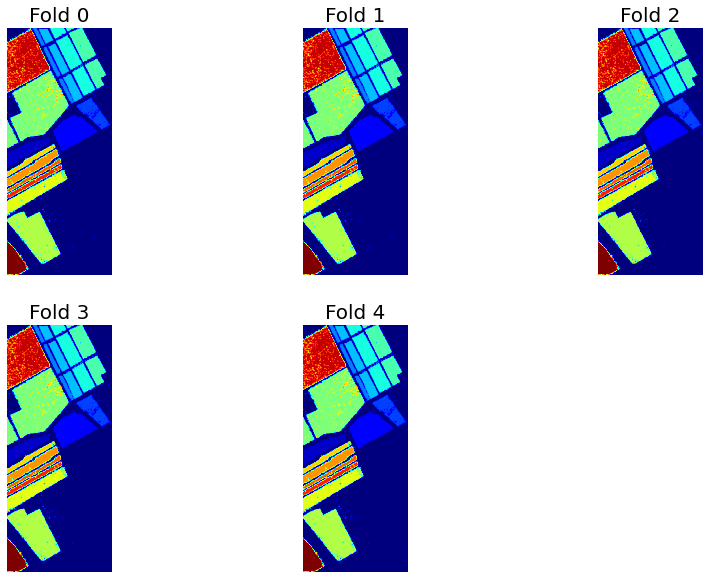

In [7]:
fig = plt.figure(figsize=(15, 10))
for k in range(k_folds):
    ax = plt.subplot(2, 3, k + 1)
    ax.set_title(f"Fold {k}", fontsize=20)
    plt.axis('off')
    plt.imshow(label_preds[0].reshape(label.shape[0], label.shape[1]), cmap='jet')

<AxesSubplot:>

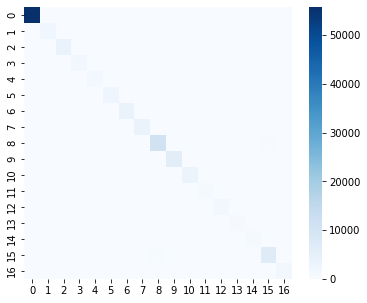

In [8]:
best_fold = pred_test_scores.index(max(pred_test_scores))
fig = plt.figure(figsize=(6, 5))
cm = confusion_matrix(label_reshaped, label_preds[best_fold])
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")